# Практическое задание №1

ФИО: Абдрахманова Нелли Тагировна

вуз: МГУ 

факультет: механико-математический

курс: 4

кафедра (если есть): ТДС

научный руководитель (если есть): Асташов Е.А.

### Задача: Оценка качества вина по его характеристикам
### Метрика качества: Accuracy

#### 1. Считывание данных (2 балла)


(1279, 11) (1279,) (320, 11) (320,)


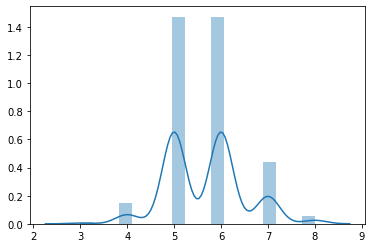

In [173]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
trainX = train.iloc[:, 0:11]
trainY = train['quality']
testX = test.iloc[:, 0:11]
testY = test['quality']
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
test['quality'].unique()
sns.distplot(list(test['quality']));

На данном шаге у вас должны быть готовы данные для обучения первой модели. 

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

baseline = KNeighborsClassifier(n_neighbors=1)
baseline.fit(trainX, trainY)
baseline_prediction = baseline.predict(testX)

a_random = np.random.randint(4, 9, 320)
a_const = np.full((320, 1), 5)

print('accuracy = %.2f' % accuracy_score(testY, baseline_prediction))
print('случайный выбор ответа: accuracy = %.2f' % accuracy_score(testY, a_random))
print('константная модель: accuracy = %.2f' % accuracy_score(testY, a_const))

accuracy = 0.53
случайный выбор ответа: accuracy = 0.23
константная модель: accuracy = 0.41


Можно ли считать этот результат хорошим?
Какую точность можно получить используя совсем простые модели:
- случайный выбор ответа
- константная модель
?

In [0]:
Результат "accuracy = 0.53" нельзя считать хорошим, по сути это тоже самое, что подкидывать монетку. 

Посмотрев на данные, заметим, что оценка находится в диапазоне от 4 до 8, поэтому в случайном выборе ответа выбираем тот же диапазон,
таким образом, получим более хорошее значение точности из возможных (Например, 0.23).

Аналогично увидим, что чаще всего в тестовых данных встречается оценка 5, поэтому в качестве константной модели возьмем a(x) = 5.
Получим accuracy = 0.41, и это будет лучшим из возможных результатов.

#### 2. Препроцессинг данных (3 балла)

Одна из причин, почему метод ближайшего соседа не даёт хороших результатов, это наличие признаков разного масштаба. 
Поэтому признаки необходимо приводить к одному и тому же диапозону значений.
Изучите раздел документации
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
и попробуйте применить к данным все методы из раздела 4.3.1

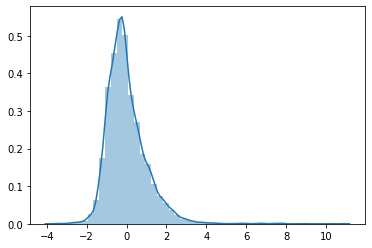

In [175]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
scaled_trainX = scale(trainX)
scaled_testX = scale(testX)
sns.distplot(list(scaled_trainX));

accuracy = 0.64


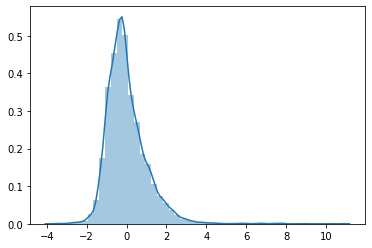

In [176]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(trainX)
scaled_trainX = scaler.transform(trainX)
scaled_testX = scaler.transform(testX)
sns.distplot(list(scaled_trainX));

baseline = KNeighborsClassifier(n_neighbors=1)
baseline.fit(scaled_trainX, trainY)
baseline_prediction = baseline.predict(scaled_testX)
print('accuracy = %.2f' % accuracy_score(testY, baseline_prediction))

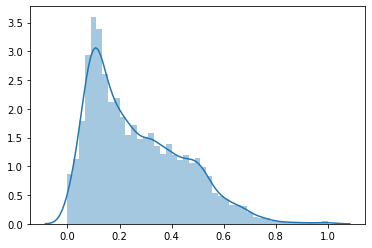

In [177]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
scaled_trainX = scaler.fit_transform(trainX)
scaled_testX = scaler.transform(testX)
sns.distplot(list(scaled_trainX));

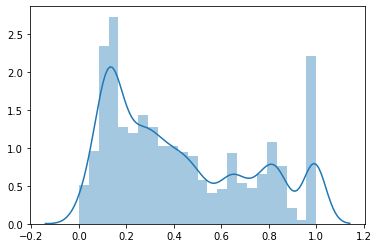

In [178]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler  
scaler = MaxAbsScaler()
scaled_trainX = scaler.fit_transform(trainX)
scaled_testX = scaler.transform(testX)
sns.distplot(list(scaled_trainX));

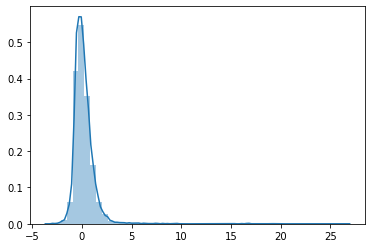

In [179]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_trainX = scaler.fit_transform(trainX)
scaled_testX = scaler.transform(testX)
sns.distplot(list(scaled_trainX));

#### 3. Подбор параметров для метода ближайшего соседа (5 баллов)

1.Подберите лучшие параметры для метода ближайших соседей использую 5-fold кроссвалидацию.
Изучите главы документации:
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
https://scikit-learn.org/stable/modules/grid_search.html#grid-search


In [180]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_trainX = scaler.fit_transform(trainX)
scaled_testX = scaler.transform(testX)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid= {'n_neighbors': range(1, 20), 'weights': ('uniform', 'distance'), 
                                      'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}, cv = 5)
grid.fit(scaled_trainX, trainY)
best_n_neighbors = grid.best_estimator_.n_neighbors
best_weights = grid.best_estimator_.weights
best_algorithm = grid.best_estimator_.algorithm
print(best_n_neighbors, best_weights, best_algorithm)

19 distance auto


После подбора оптимальных параметров обучите модель с этими параметрами на всем обучающей выборке и посмотрите качество на тесте.

In [181]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, algorithm=best_algorithm)
knn.fit(scaled_trainX, trainY)
prediction = knn.predict(scaled_testX)
print('accuracy = %.2f' % accuracy_score(testY, prediction))

accuracy = 0.67


#### 4. Линейная регрессия (4 балла)

Напишите код функций для нахождения весов линейной регрессии (вспомните формулы из лекции 3), а также для применения этих весов (предсказание).

Если эти функции будут правильно реализованы, то в дальнейшем можно будет применять класс MyLinearRegression со стандартным scikit-learn интерфейсом, в котором нас интересуют два метода: fit и predict.

In [0]:
import numpy as np
def solve_linear_regression(X, y):
    # ваш код
    # return weights, bias
    n, m = scaled_trainX.shape
    X0 = np.ones((n,1))
    Xnew = np.hstack((X0, scaled_trainX))
    a = np.dot(Xnew.T, Xnew)
    b = np.dot(Xnew.T, trainY)
    matrix = np.linalg.solve(a, b)
    bias = matrix[0]
    weights = matrix[1:12]
    return weights, bias

def make_prediction(weights, bias, testX):
    n, m = scaled_testX.shape
    X0 = np.ones((n,1))
    testXnew = np.hstack((X0, scaled_testX))
    matrix = np.hstack((bias, weights))
    return np.dot(testXnew, matrix)

class MyLinearRegression():
    def __init__(self,):
        self.name = 'LinearRegression'
    
    def fit(self, X, Y):
        self.weights, self.bias = solve_linear_regression(X, Y)
        print('Coefficients: \n', self.weights)
        return self
    
    def predict(self, X):
        return make_prediction(self.weights, self.bias, X)  

Протестируйте ваш класс на предложенном датасете

In [183]:
from sklearn.metrics import r2_score, mean_squared_error
baseline = MyLinearRegression()
baseline.fit(scaled_trainX, trainY)

baseline_prediction = baseline.predict(scaled_testX)
print('Predict (10): \n', baseline_prediction[:10])

print('acc = %.5f' % accuracy_score(testY, np.round(baseline_prediction)), 
      'mse = %.5f' % mean_squared_error(testY, baseline_prediction), 'r2 = %.5f' % r2_score(testY, baseline_prediction))

Coefficients: 
 [ 0.0182998  -0.26937587 -0.02808996  0.00956857 -0.03926156  0.03027898
 -0.13211406 -0.03936013 -0.06841185  0.15417037  0.39909076]
Predict (10): 
 [6.29251114 4.93709263 4.78745839 6.54741593 5.55726747 5.61922879
 6.27141182 5.6951969  5.40021733 5.70653309]
acc = 0.50938 mse = 0.43589 r2 = 0.34360


Сравните результаты вашего класса и аналогичного из scikit-learn
sklearn.linear_model.LinearRegression

In [185]:
from sklearn import linear_model, metrics 
reg = linear_model.LinearRegression() 
reg.fit(scaled_trainX, trainY) 
print('Coefficients: \n', reg.coef_) 

reg_prediction = reg.predict(scaled_testX)
print('Predict (10): \n', reg_prediction[:10])

print('acc = %.5f' % accuracy_score(testY, np.round(reg_prediction)), 
      'mse = %.5f' %mean_squared_error(testY, reg_prediction), 'r2 = %.5f' % r2_score(testY, reg_prediction))


Coefficients: 
 [ 0.0182998  -0.26937587 -0.02808996  0.00956857 -0.03926156  0.03027898
 -0.13211406 -0.03936013 -0.06841185  0.15417037  0.39909076]
Predict (10): 
 [6.29251114 4.93709263 4.78745839 6.54741593 5.55726747 5.61922879
 6.27141182 5.6951969  5.40021733 5.70653309]
acc = 0.50938 mse = 0.43589 r2 = 0.34360


Результаты MyLinearRegression и LinearRegression совпадают (смотрим на коэффициенты регрессии и на предсказания)

#### 5. Лучшая модель (3 балла )


Попробуйте улучшить результат на тестовом датасете, используя все пройденные  до 15 марта  (первые 4 лекции) алгоритмы машинного обучения и любые методы препроцессинга и постпроцессинга. Если параметры не дефолтные, то  подбр параметров должен осуществлять путём кросс-валидации без привлечения тестового датасета.

In [187]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='uniform', random_state=0)
scaled_trainX = quantile_transformer.fit_transform(trainX)
scaled_testX = quantile_transformer.transform(testX)

from sklearn.linear_model import RidgeCV
regR = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = 5)
regR.fit(scaled_trainX, trainY)
predR = regR.predict(scaled_testX)
print ('acc = %.2f' % accuracy_score(testY, np.round(predR)), 
       'mse = %.2f' % mean_squared_error(testY, predR), 'r2 = %.2f' % r2_score(testY, predR))

acc = 0.56 mse = 0.42 r2 = 0.36
Coefficients: 
 [ 0.28599238 -0.63727155 -0.19385541  0.12574143 -0.15710973  0.02064116
 -0.19756419 -0.3901157  -0.11997749  0.69549513  0.77995438]
Predict (10): 
 [6.2621419  5.01794744 4.76190146 6.32321694 5.60456466 5.62552176
 6.46309892 5.77664192 5.34748443 5.7923469 ]
acc = 0.55625 mse = 0.42399 r2 = 0.36152


In [0]:
С помощью регрессии mse = 0.42, r2 = 0.36.

In [0]:
Методом ближайшего соседа в пункте 3) acc = 0.67.